In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,Matern

In [7]:
with open("data_train.pickle", "rb") as handle:
    data_train = pkl.load(handle)

In [8]:
with open("data_val.pickle", "rb") as handle:
    data_val = pkl.load(handle)

## Problem 1
Take the Gaia XP data given to you by Jiadong Li. It consists of a set of ESA Gaia Mission BP/RP spectral coefficients, and a set of labels from SDSS-IV APOGEE. These are real data, people, and a real problem. Use linear regression to learn a function that takes as input the BP and RP spectral coefficients and delivers as output the label TEFF, which is the effective temperature of the stars. Instead of using the BP/RP coefficients right out of the box, consider dividing all BP & RP coefficients by the first (zeroth) component of the RP coefficients. Don’t forget to include the number 1 as a regressor (the constant term). Train on the training set and use the validation set to assess your accuracy (RMS maybe or median absolute deviation). Ask questions of Hogg and Jiadong, who know these data well!


In [9]:
data = np.column_stack((data_train['bp_coef'],data_train['rp_coef']))

In [10]:
data/= data_train['rp_coef'][0][0]

In [11]:
outs = data_train['labels'][:,0]

In [12]:
outs  = outs[0:4000]
data = data[0:4000]

In [13]:
X_train, y_train = data, outs

In [14]:
X = np.column_stack((data_val['bp_coef'],data_val['rp_coef']))/data_train['rp_coef'][0][0]
y = data_val['labels'][:,0]

In [15]:
kernel = 1 * RBF()
gaussian_process = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


316**2 * RBF(length_scale=1e-05)

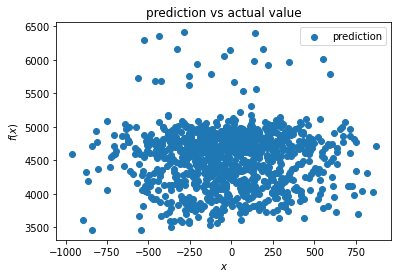

In [18]:
prediction = gaussian_process.sample_y(X)

#plt.scatter(X, y, label="Mean Prediction")
plt.scatter(prediction, y, label="prediction")

plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("prediction vs actual value")

Something has really gone wrong here!

## Problem 2
Now consider only the RP spectral coefficients. Make a linear model to predict TEFF. Then make all quadratic combinations of the RP coefficients and make a linear model of the linear and quadratic combinations to predict TEFF. Can you afford to do cubic too? Once again, divide the coefficients by RP[0] to start. Once again, don’t forget to include the constant term. Train on the training set and use the validation set to assess your accuracy.


In [19]:
data = data_train['rp_coef']
data/= data_train['rp_coef'][0][0]

In [20]:
outs = data_train['labels'][:,0]

In [21]:
outs = outs[0:4000]
data = data[0:4000]

In [22]:
X_train, y_train = data, outs

In [23]:
X = data_val['rp_coef']/data_train['rp_coef'][0][0]
y = data_val['labels'][:,0]

In [ ]:
kernel = 1 * RBF( length_scale=1.0, length_scale_bounds=(1e-10, 1e10))
gaussian_process = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

In [ ]:
prediction = gaussian_process.sample_y(X)

#plt.scatter(X, y, label="Mean Prediction")
plt.scatter(prediction, y, label="prediction")

plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("prediction vs actual value")

This really is not going very well!

## Problem 3
Fit the famous data set 11 from Problem Set 2, but now with a single Gaussian Process. Choose as your kernel the Matern 3/2 kernel. Use the form of the GP regression shown in class, that involves both the kernel matrix K and the noise covariance C. Plot the GP result by evaluating the GP on a set of test locations which is a fine grid of spacing (say) 0.1 days over a footprint that goes from -50 days to 1075 days (ie, more than the span of the data). Plot the GP result for three different (but all reasonable) values for the Matern kernel width (the hyper-parameter). 

In [ ]:
with open("data.pkl", "rb") as handle:
    data = pkl.load(handle).T

In [ ]:
x  = data[0]
C = 1/data[1]**2
y =data[-1]

In [ ]:
kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
gaussian_process = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=9)
gaussian_process.fit(x.reshape(-1,1), y)
gaussian_process.kernel_

In [ ]:
x_val = np.linspace(-50,1075,5000)
x_val = x_val.reshape(-1,1)
prediction = gaussian_process.sample_y(x_val)

plt.figure(figsize=(15, 5))
plt.errorbar(x, y, yerr = data[1], marker = 'o', color = 'k', alpha = 0.3, label='data')
plt.legend(loc='lower right')
#plt.scatter(x_val, mean_prediction, label="Mean Prediction")
plt.scatter(np.linspace(-50,1075,5000), prediction, label="prediction")
# plt.fill_between(
#     x_val.ravel(),
#     mean_prediction - 1.96 * std_prediction,
#     mean_prediction + 1.96 * std_prediction,
#     alpha=0.5,
#     label=r"95% confidence interval",
# )
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Guassian process on Data Set 11")
plt.show()

What a mess!